In [1]:
# THIS NOTEBOOK IS HONESTLY JUST HERE TO MESS WITH TO UNDERSTAND NNs BETTER BY IMPLEMENTING FROM SCRATCH
# IDK IF WE SHOULD TRY AND GET THIS FULLY WORKING BECAUSE COWAN MIGHT NOT THINK ITS MY CODE
# (because people in this class somehow get 27% accuracy on a 1/4 chance and he thinks we're all that dumb)

In [2]:
import numpy as np
from util.helper_functions import *
from util.ImageGeneration import *

In [3]:
class ConvLayer:
    """
    Represents the Convolutional Layer to the NN
    params:
        num_kernels : number of filters to "scan" with
        kernel-size : size of each filter, this is 3x3 
        stride : how many steps to take between "scans" (1)
    """
    def __init__(self, num_kernels, kernel_size, stride = 1):

        # General Init
        self.num_kernels = num_kernels
        self.kernel_size = kernel_size
        self.stride = stride
        self.weights = np.random.randn(num_kernels, kernel_size, kernel_size)


    def forward(self, input_data):
        """Forward pass of the convolution layer"""
        examples, w, _, channels = input_data.shape
        
        kernels = self.num_kernels
        k_size = self.kernel_size

        # Output Init
        output_size = ((w - k_size) // self.stride) + 1
        output = np.zeros((examples, kernels, output_size, output_size, channels))

        # Compute the feature map for each kernel (same as helpers.apply_convolution, but allows > 1 kernel)
        for n in range(examples):
            for k in range(kernels):
                for i in range(w - k_size + 1):
                    for j in range(w - k_size + 1):
                        region = input_data[n, i : i + k_size, j : j + k_size]
                        for c in range(channels):
                            output[n, k, i, j, c] += np.sum(self.weights[k, :, :] * region[:, :, c])
                            
        return relu(output)

    def backward(self):
        pass

In [4]:
class PoolingLayer:
    """
    Represents the Pooling (mean pooling) Layer of the NN
    params:
        pool-size : size of subsection to take the mean of 
        stride : how many steps to take (pool size usually)
    """
    def __init__(self, pool_size, stride = None):
        self.pool_size = pool_size
        self.stride = pool_size if stride is None else stride

    def forward(self, input_data):
        """Forward pass of the pooling layer, (mean pooling)"""
        examples, feature_maps, w, _, channels = input_data.shape

        p = self.pool_size
        output_size = ((w - p) // self.stride) + 1
        output = np.zeros((examples, feature_maps, output_size, output_size, channels))
        for n in range(examples):
            for k in range(feature_maps):
                for i in range(0, w - p + 1, self.stride):
                    for j in range(0, w - p + 1, self.stride):
                        region = input_data[n, k, i : i + p, j : j + p]
                        for c in range(channels):
                            output[n, k, i // p, j // p, c] = np.mean(region[:, :, c])

        return output

In [5]:
class ConnectedLayer:
    """
    This is the actual input layer to the model, basically just applies softmax
    """
    def __init__(self, input_size, num_classes):
        self.weights = np.zeros((num_classes, input_size))

    def forward(self, input_data):
        flattened = input_data.reshape(input_data.shape[0], -1)
        dot_product = np.dot(self.weights, flattened.T)
        return softmax(dot_product)
        

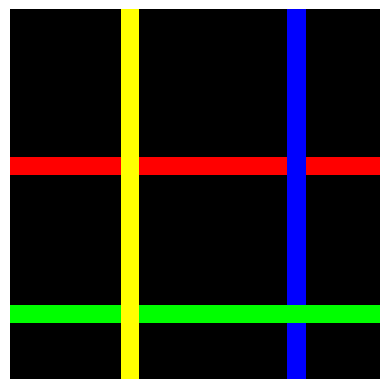

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1.])

In [20]:
data = DataSet()
img_gen = ImageGenerator(1000, dataset = data, seed = 1)
input_data = np.array(data.image_data)
input_data = one_hot_encode(input_data)
row_col = row_col_features(input_data)
load_image(data, 0).display()
row_col[0, :20, 0]

In [21]:
layers = [ConvLayer(1, 3), PoolingLayer(2), ConnectedLayer(324, 4)]
last_output = input_data
for layer in layers:
    last_output = layer.forward(last_output)

In [22]:
last_output

array([[0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25]])